In [1]:
#import the necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ABIOLA\Downloads\dementia_dataset.csv")

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.shape

(373, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
#the number of missing values in the columns
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [8]:
#Replacing missing values in columns with mean 
mean_1 = df['SES'].mean()
mean_2 = df['MMSE'].mean()

df['SES'].replace(np.nan, mean_1, inplace = True)
df['MMSE'].replace(np.nan, mean_2, inplace = True)

In [9]:
#the number of missing values after replacement
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [10]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [11]:
#check for duplicate data
duplicate =df.duplicated()
print(duplicate.sum())


0


In [12]:
#correlation between all the variables
corr = df.corr()
corr

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.050422,-0.029020,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030258,0.065786,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.050422,-0.030258,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,-0.029020,0.065786,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.089436,0.341857,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.246673,0.039494,-0.029340,-0.988877,0.213476,1.000000


<AxesSubplot:>

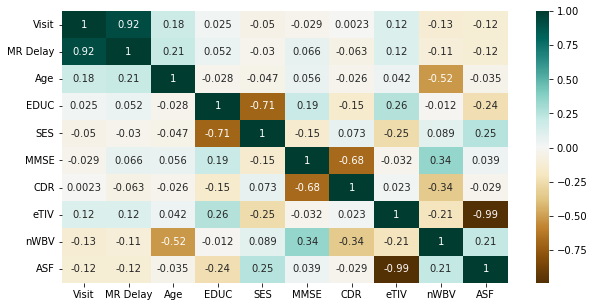

In [13]:
plt.figure(figsize = (10, 5))
sns.heatmap(corr,cmap ='BrBG', annot = True)

In [14]:
#creating dummy variables
df_dummy = pd.get_dummies(df)

In [15]:
print(df_dummy.columns)

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF',
       ...
       'MRI ID_OAS2_0185_MR3', 'MRI ID_OAS2_0186_MR1', 'MRI ID_OAS2_0186_MR2',
       'MRI ID_OAS2_0186_MR3', 'Group_Converted', 'Group_Demented',
       'Group_Nondemented', 'M/F_F', 'M/F_M', 'Hand_R'],
      dtype='object', length=539)


In [16]:
df_dummy = pd.get_dummies(df, drop_first = True)

In [17]:
print(df_dummy.columns)

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF',
       ...
       'MRI ID_OAS2_0184_MR2', 'MRI ID_OAS2_0185_MR1', 'MRI ID_OAS2_0185_MR2',
       'MRI ID_OAS2_0185_MR3', 'MRI ID_OAS2_0186_MR1', 'MRI ID_OAS2_0186_MR2',
       'MRI ID_OAS2_0186_MR3', 'Group_Demented', 'Group_Nondemented', 'M/F_M'],
      dtype='object', length=534)


In [18]:
df_dummy.head()


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,...,MRI ID_OAS2_0184_MR2,MRI ID_OAS2_0185_MR1,MRI ID_OAS2_0185_MR2,MRI ID_OAS2_0185_MR3,MRI ID_OAS2_0186_MR1,MRI ID_OAS2_0186_MR2,MRI ID_OAS2_0186_MR3,Group_Demented,Group_Nondemented,M/F_M
0,1,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,...,0,0,0,0,0,0,0,0,1,1
1,2,457,88,14,2.000000,30.0,0.0,2004,0.681,0.876,...,0,0,0,0,0,0,0,0,1,1
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,...,0,0,0,0,0,0,0,1,0,1
3,2,560,76,12,2.460452,28.0,0.5,1738,0.713,1.010,...,0,0,0,0,0,0,0,1,0,1
4,3,1895,80,12,2.460452,22.0,0.5,1698,0.701,1.034,...,0,0,0,0,0,0,0,1,0,1


Text(0, 0.5, 'MR Delay')

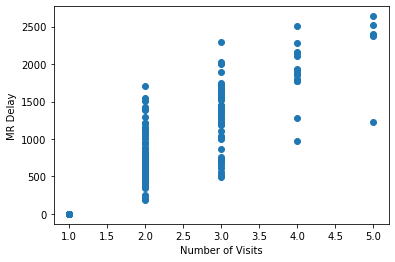

In [19]:
plt.scatter(df['Visit'], df['MR Delay'])
plt.xlabel("Number of Visits")
plt.ylabel("MR Delay")

In [20]:
df['Group']

0      Nondemented
1      Nondemented
2         Demented
3         Demented
4         Demented
          ...     
368       Demented
369       Demented
370    Nondemented
371    Nondemented
372    Nondemented
Name: Group, Length: 373, dtype: object

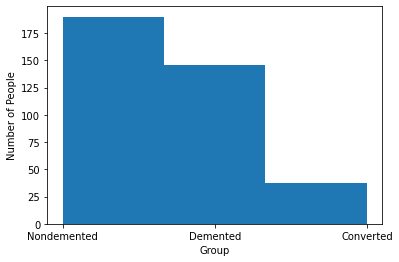

In [21]:
plt.hist(df['Group'], bins =3)
plt.xlabel('Group')
plt.ylabel('Number of People')
plt.show()

In [22]:
#the number of demented people
demented = df[df['Group'] == 'Demented']
demented

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,2.460452,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,2.460452,27.0,1.0,1365,0.727,1.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.000000,24.0,0.5,1354,0.733,1.296
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.000000,21.0,1.0,1351,0.708,1.299
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.000000,28.0,0.5,1704,0.711,1.030
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037


In [23]:
#the number of non-demented people
non_demented = df[df['Group'] == 'Nondemented']
non_demented

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [24]:
#the number of demented people with 2 or more visits
demented_2 = df[(df['Group'] == 'Demented') & (df['Visit'] >= 2)]
demented_2

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.000000,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.000000,0.5,1698,0.701,1.034
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,2.460452,27.000000,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,2.460452,27.000000,1.0,1372,0.710,1.279
16,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.000000,24.000000,0.5,1480,0.791,1.186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,OAS2_0181,OAS2_0181_MR3,Demented,3,1107,F,R,77,12,2.460452,27.342318,1.0,1159,0.733,1.515
360,OAS2_0182,OAS2_0182_MR2,Demented,2,776,M,R,75,12,2.460452,20.000000,0.5,1654,0.696,1.061
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.000000,21.000000,1.0,1351,0.708,1.299
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.000000,0.5,1693,0.694,1.037


In [25]:
#the number of demented people with only 1 visit
demented_1 = df[(df['Group'] == 'Demented') & (df['Visit'] == 1)]
demented_1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,2.460452,28.0,0.5,1357,0.748,1.293
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.000000,27.0,0.5,1457,0.806,1.205
17,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.000000,30.0,0.5,1447,0.769,1.213
25,OAS2_0014,OAS2_0014_MR1,Demented,1,0,M,R,76,16,3.000000,21.0,0.5,1602,0.697,1.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,OAS2_0179,OAS2_0179_MR1,Demented,1,0,M,R,79,20,1.000000,26.0,0.5,1548,0.711,1.134
356,OAS2_0181,OAS2_0181_MR1,Demented,1,0,F,R,74,12,2.460452,26.0,0.5,1171,0.733,1.499
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,2.460452,23.0,0.5,1661,0.698,1.056
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.000000,24.0,0.5,1354,0.733,1.296


In [26]:
#the number of converted people 
converted_df = df[df['Group'] == 'Converted']
converted_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


In [27]:
#the mumber of Non-Demented people
non_demented_df = df[df['Group'] == 'Nondemented']
non_demented_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
